In [ ]:
Project Title: Bigmart Sales Prediction

In [ ]:
Description:

In [60]:
 # import libraries
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics   
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Here we are importing dataset by using pandas
data = pd.read_csv(r"E:\ML Project\Big mart dataset.csv")

In [4]:
# always create a copy 
df = data.copy()

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# number of data points & number of features
df.shape

(8523, 12)

In [7]:
# getting some information about thye dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Since Item_Identifier, Outlet_Identifier don't have significant values, we can drop them.

In [9]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier' ],  axis = 1)

In [10]:
df.shape

(8523, 10)

In [11]:
# EDA

In [12]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [14]:
df.shape

(8523, 10)

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
# checking for missing values
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Handling  Missin Values

Mean ---> average

Mode ---> more repeated value

In [17]:
# mean value of "Item_Weight" column
df['Item_Weight'].mean()

12.857645184136183

In [18]:
# filling the missing values in "Item_weight column" with "Mean" value
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [19]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
# mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [21]:
# filling the missing values in "Outlet_Size column" with "Mode" value
df.Outlet_Size = df.Outlet_Size.fillna('Medium')

In [22]:
# checking for missing values
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='Item_Outlet_Sales'>

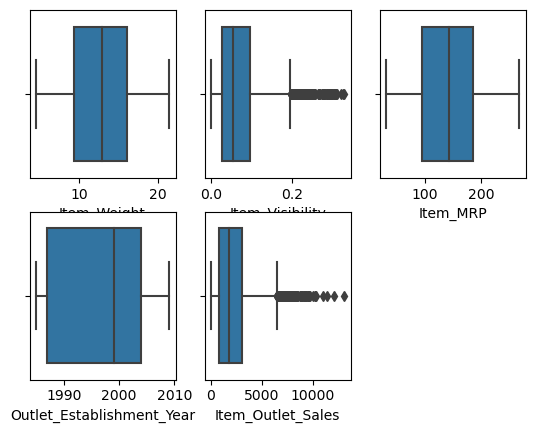

In [24]:
#checking for outliers

plt.figsize = (16,8)
plt.subplot(2,3,1)
sns.boxplot(df['Item_Weight'])

plt.subplot(2,3,2)
sns.boxplot(df['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(df['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(df['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(df['Item_Outlet_Sales'])


In [25]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

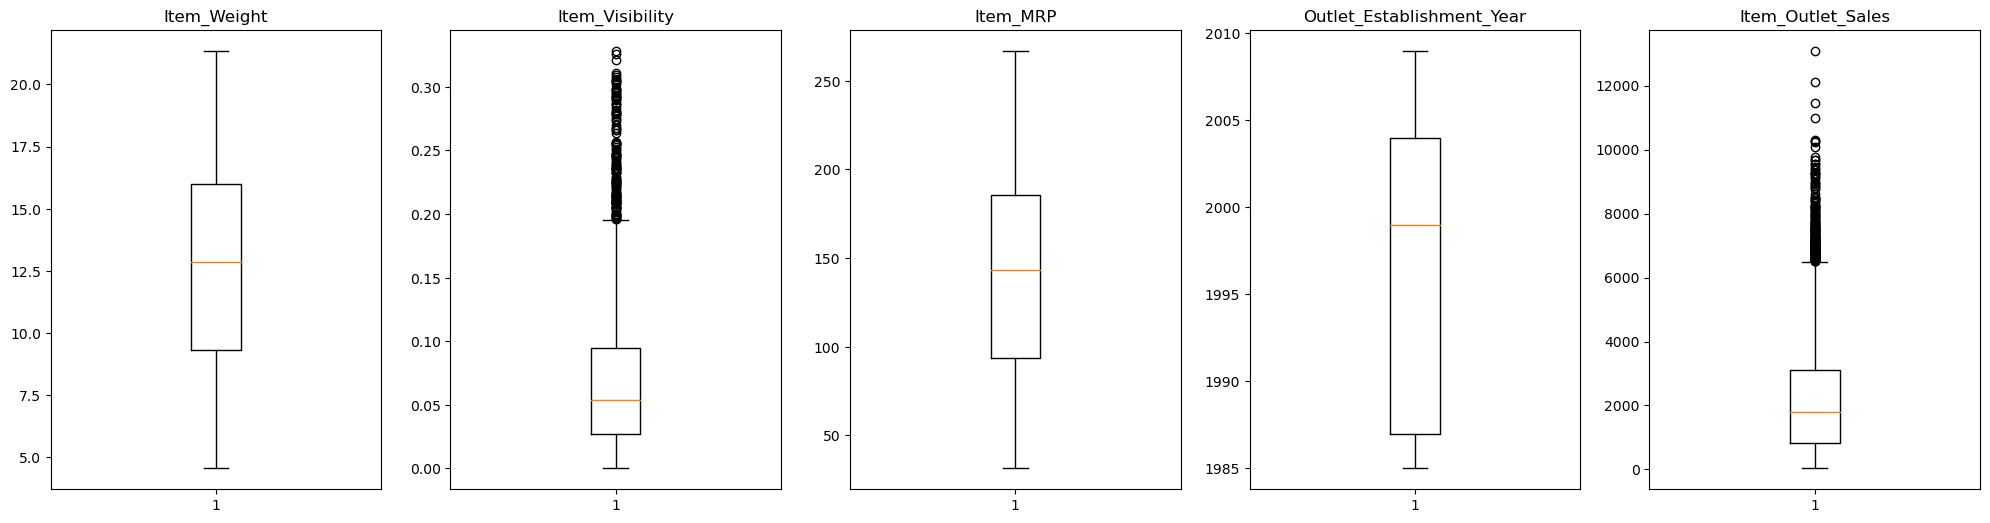

In [26]:
# outliers detection using boxplot
plt.figure(figsize =(20, 30))

for i , variable in enumerate(numeric_columns):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

In [48]:
#plt.subplot()

In [49]:
#plt.figsize = (16,8)
#plt.subplot(2,3,1)
#sns.boxplot(df['Item_Weight'])

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


Text(0.5, 1.0, 'Item_Visibility Distribution after removing outliers')

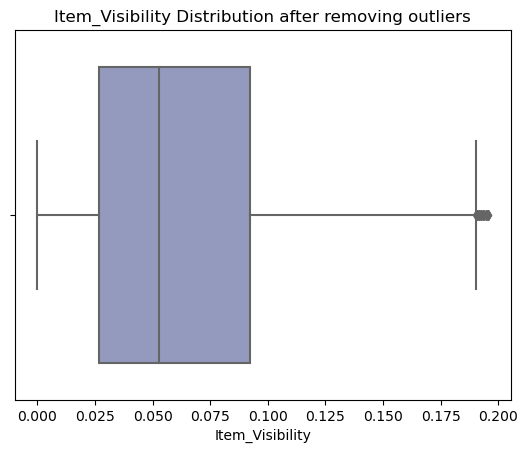

In [27]:
#removing ouliers


def outliers(df1, feature):
    Q1= df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "Item_Visibility")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
df = df[(df['Item_Visibility'] > lower) & (df['Item_Visibility'] < upper)]


sns.boxplot(x=df['Item_Visibility'], palette='BuPu')
plt.title('Item_Visibility Distribution after removing outliers')

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


C:\Users\Dell\AppData\Local\Temp\ipykernel_9860\2572525454.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df[(df['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

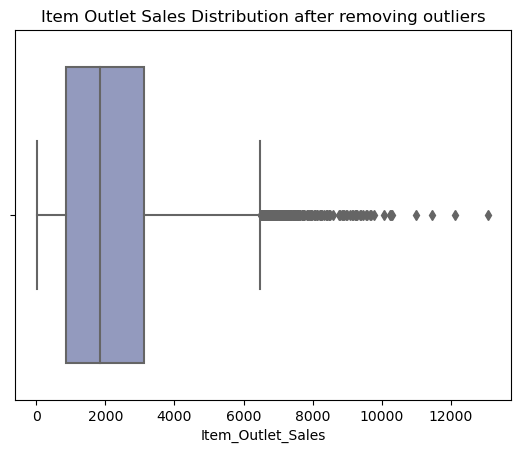

In [28]:
def outliers(df1, feature):
    Q1= df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "Item_Outlet_Sales")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
data = df[(df['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=df['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [29]:
#correlation matrix

<AxesSubplot:>

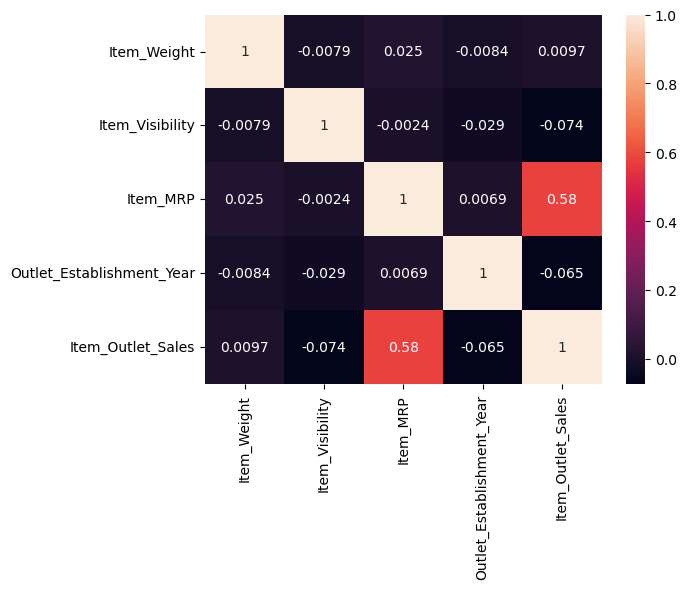

In [30]:
#set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.Figure(figsize=(20,5))
sns.heatmap(df.corr(), annot=True)   
# annot: prints the correlation values in the chart

In [ ]:
#The diagonal entries are all '1' which represents the correlation of the variable with itself. The dark red squares represent the variables with strong positive correlation. The dark black squares represent the variables with strong negative correlation. 

In [94]:
#Correlation:

#Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

In [31]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007942,0.025431,-0.008421,0.009691
Item_Visibility,-0.007942,1.000000,-0.002377,-0.028979,-0.073755
Item_MRP,0.025431,-0.002377,1.000000,0.006896,0.577367
Outlet_Establishment_Year,-0.008421,-0.028979,0.006896,1.000000,-0.065382
Item_Outlet_Sales,0.009691,-0.073755,0.577367,-0.065382,1.000000


In [32]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Numerical Features

In [33]:
#give us the some theme for our plot
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


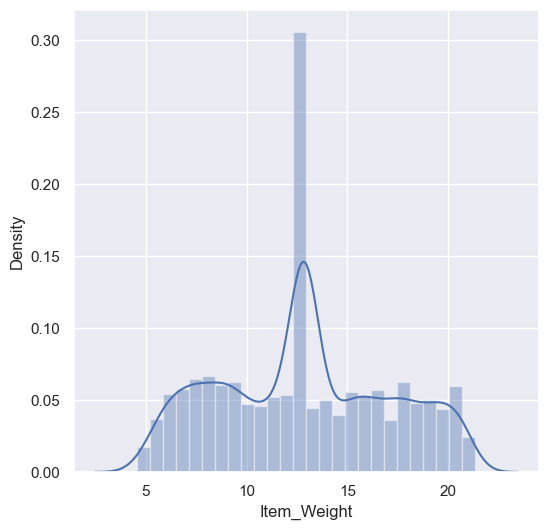

In [34]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

In [35]:
#item _weight:5-20 and we observe that maximum 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


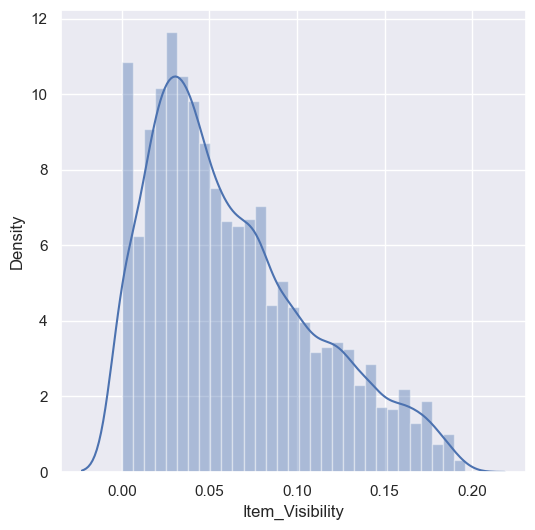

In [36]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


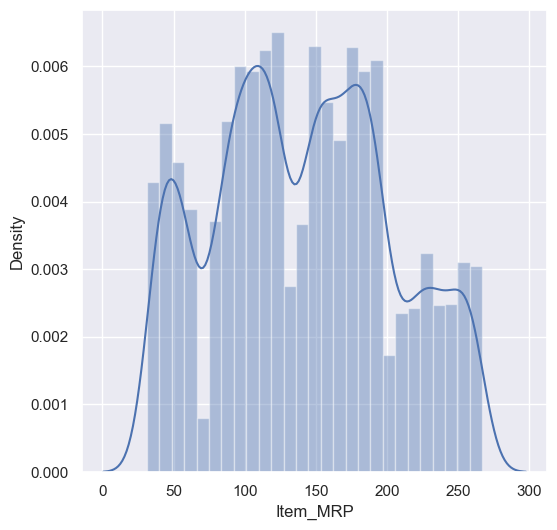

In [37]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


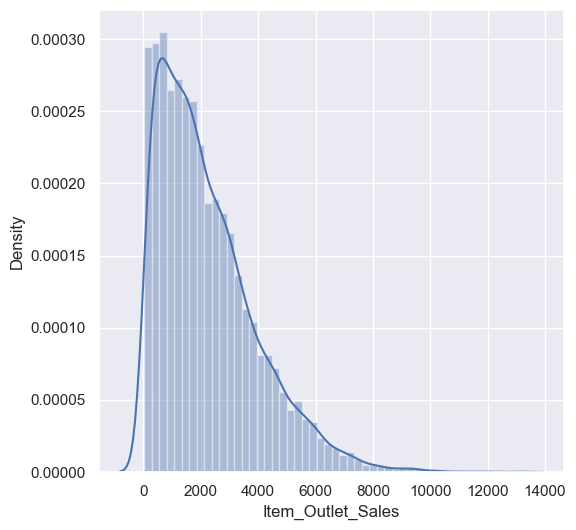

In [38]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

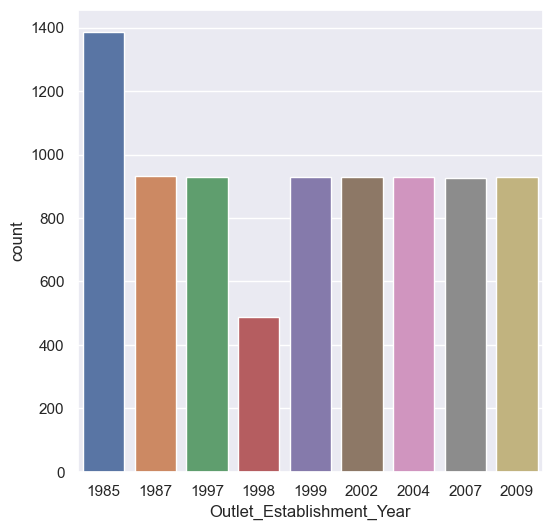

In [39]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

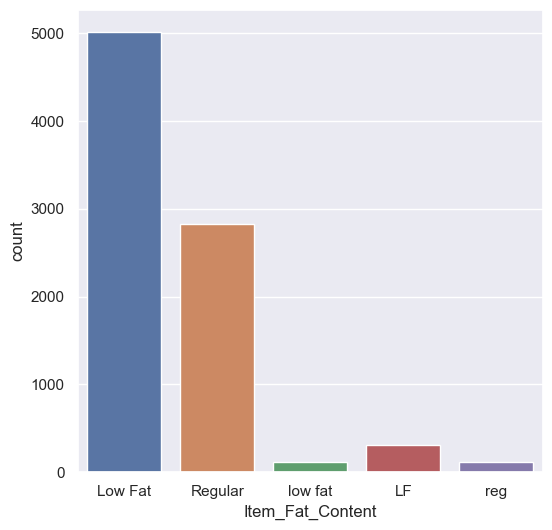

In [40]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

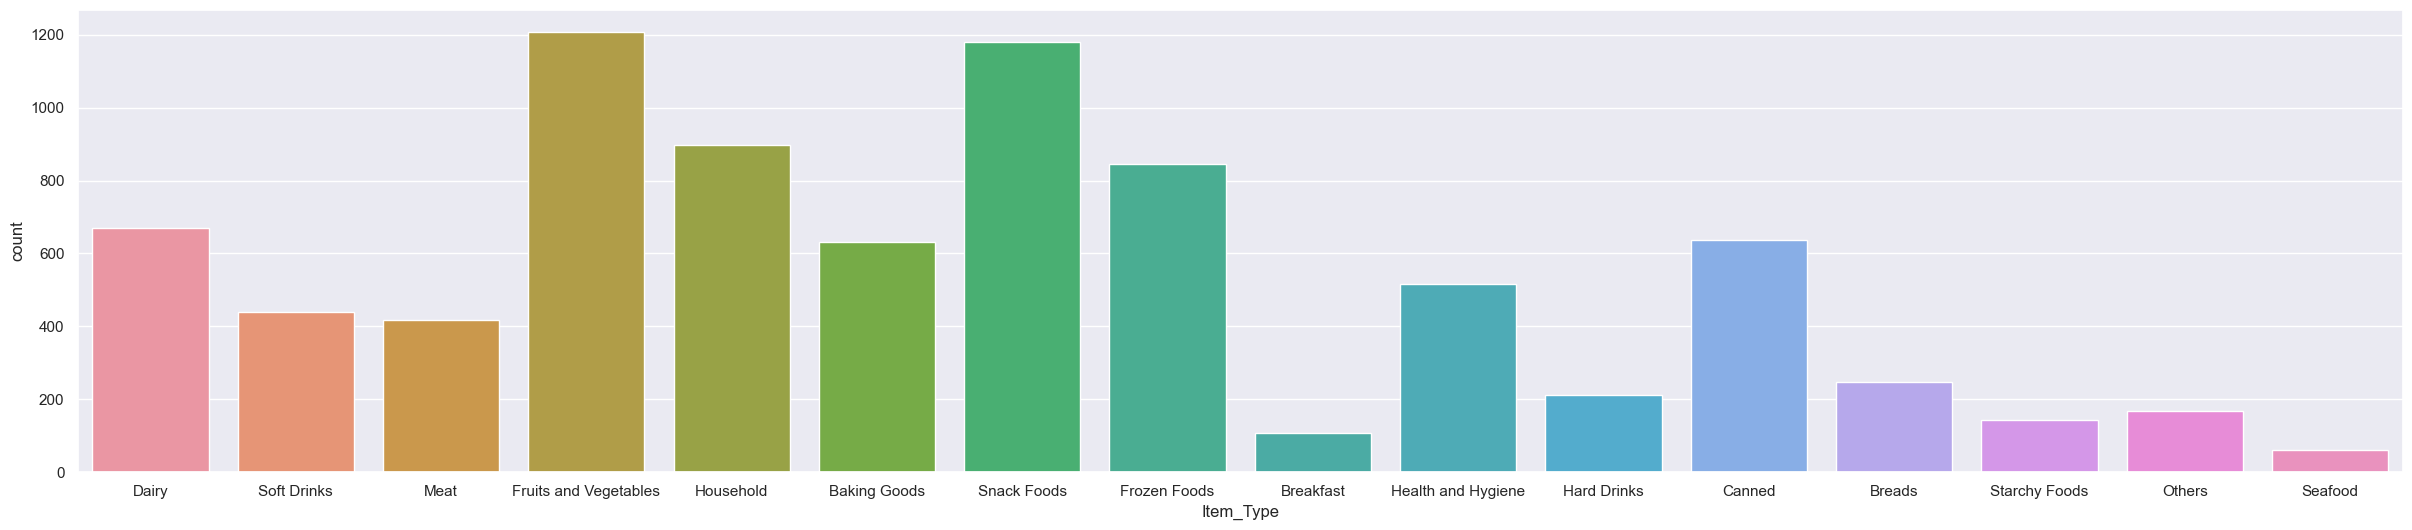

In [41]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

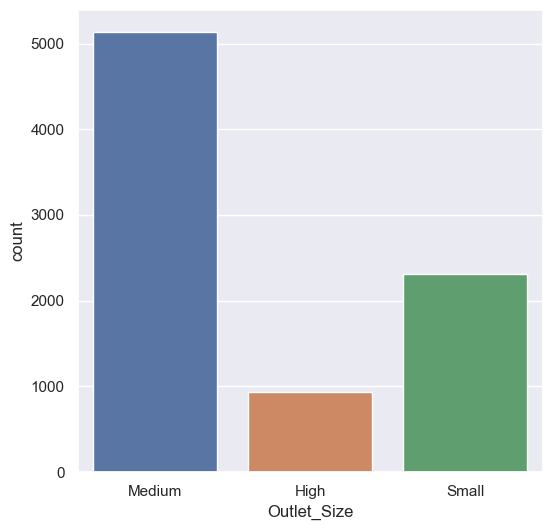

In [42]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [43]:
#Observation: The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12. There are some items that are not visible at all and the maximum visibility of the item is 33%. The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89. Most of the stores are established in year from 1985-1990 and 1995 to 2000. From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period. Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.

In [ ]:
#Categorical

#Around 64% of the total items contains low fat while remaining contains regular fat. More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods. Sale of breakfast and seafood type of items are very less. All the stores are selling almost same number of items except the OUT010 and OUT019 stores. 45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big. 39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities. 65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.

In [ ]:
#Data Pre-Processing

In [44]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
df['Item_Fat_Content'].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [46]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [47]:
df['Item_Fat_Content'].value_counts()

Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

In [48]:
le = LabelEncoder()

In [49]:
df.Item_Fat_Content = df.Item_Fat_Content.replace({'Low Fat' :0, 'Regular': 1})

df.Item_Type = le.fit_transform(df.Item_Type)

df.Outlet_Size = df.Outlet_Size.replace({'Small' : 0,  'Medium' : 1,  'High' : 2})

df.Outlet_Location_Type = le.fit_transform(df.Outlet_Location_Type) 

df.Outlet_Type = le.fit_transform(df.Outlet_Type)

In [50]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,2,2,1,994.7052


In [51]:
df.shape

(8379, 10)

In [52]:
# Splitting features and Target

In [53]:
x = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [54]:
# Splitting the data into Train and Test

In [55]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [57]:
from sklearn.metrics import mean_absolute_error as MAE_score
from sklearn.metrics import mean_squared_error as MSE_score
from sklearn.metrics import r2_score as R2_score

In [100]:
x_train.shape

(6703, 9)

#calculate Adj R2
n= len(x_train)
p = len(x.columns)

Adj_r_squared_SGD = 1 - (1-R2_score)*(n-1)/(n-p-1)
Adj_r_squared_SGD

#adj_R2 = 1- ((1-R2_score) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#adj_R2

p = len(x.columns)
p 

n= len(x_train)
n

In [58]:
#Linear Regression Model:


model = LinearRegression()
model.fit(x_train , y_train)

linreg_predict = model.predict(x_test)

#scores
MAE_score = mean_absolute_error(y_test , linreg_predict)
MSE_score = mean_squared_error(y_test , linreg_predict)
R2_score = r2_score(y_test , linreg_predict)

print(f" Mean Absolute Error: {MAE_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(MSE_score)}\n")
print(f" R^2 Score: {R2_score}\n")

#cross validation score
CVS(LinearRegression(),x,y)

 Mean Absolute Error: 913.4180602258347

 Squared Mean Squared Error: 1211.2241506990501

 R^2 Score: 0.5175024285226935



array([0.52237284, 0.4983679 , 0.4870204 , 0.5018144 , 0.4998005 ])

In [131]:
#calculate Adj R2

n= len(x_train)
p = len(x.columns)

Adj_r_squared_linreg = 1 - (1-0.5175)*(n-1)/(n-p-1)
Adj_r_squared_linreg
#adj_R2 = 1- ((1-R2_score) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#adj_R2

0.5168511878081578

In [115]:
# Decision Tree Model:


model = DecisionTreeRegressor()
model.fit(x_train, y_train)

dt_predict = model.predict(x_test)

# Score Metrics 
dt_MAE = mean_absolute_error(y_test, dt_predict)
dt_MSE = mean_squared_error(y_test, dt_predict)
R2_score = r2_score(y_test , dt_predict)

print(f" Mean Absolute Error: {dt_MAE}\n")
print(f" Mean Squared Error: {dt_MSE}\n")
print(f" R^2 Score: {R2_score}\n")


# Cross Validation Score check
CVS(DecisionTreeRegressor(),x,y)

 Mean Absolute Error: 1059.1527331742243

 Mean Squared Error: 2353231.2768900753

 R^2 Score: 0.226053928011535



array([0.20976336, 0.09461939, 0.08422015, 0.2279884 , 0.20855757])

In [118]:
# Decision tree by using Hyper parameter tunning:


search_dict = {'max_depth' : range(5,16), 'min_samples_split' : [50, 75, 100]}

grid = GridSearchCV(dt,   param_grid = search_dict)

model_grid = grid.fit(x_train, y_train)

model_grid.best_params_


{'max_depth': 7, 'min_samples_split': 100}

In [121]:
model_grid_with_best_predict = model_grid.predict(x_test)

# Score Metrics 
grid_MAE = mean_absolute_error(y_test, model_grid_with_best_predict)
grid_MSE = mean_squared_error(y_test, model_grid_with_best_predict)
R2_score = r2_score(y_test , model_grid_with_best_predict)
                    
print(f" Mean Absolute Error: {grid_MAE}\n")
print(f" Mean Squared Error: {grid_MSE}\n")
print(f" R^2 Score: {R2_score}\n")


# Cross Validation Score check
CVS(DecisionTreeRegressor(),x,y)

 Mean Absolute Error: 774.9745792208436

 Mean Squared Error: 1206225.555057589

 R^2 Score: 0.6032886612391667



array([0.21238267, 0.09051579, 0.07221807, 0.19000209, 0.19620592])

In [130]:
#calculate Adj R2

n= len(x_train)
p = len(x.columns)

Adj_r_squared_dt = 1 - (1-0.6032)*(n-1)/(n-p-1)
Adj_r_squared_dt
#adj_R2 = 1- ((1-R2_score) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#adj_R2

0.6026664276109368

In [126]:
#Random Forest model:

#n_jobs=4, random_state=101

rf = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100)

rf.fit(x_train, y_train)


rf_predict = rf.predict(x_test)

# Score Matrics
rf_MAE = mean_absolute_error(y_test, rf_predict)
rf_MSE = mean_squared_error(y_test, rf_predict)
R2_score = r2_score(y_test , rf_predict)

print(f" Mean Absolute Error: {rf_MAE}\n")
print(f" Mean Squared Error: {rf_MSE}\n")
print(f" R^2 Score: {R2_score}\n")


# Cross Validation Score check
CVS(RandomForestRegressor(),x, y)

 Mean Absolute Error: 774.2662027078061

 Mean Squared Error: 1173216.1338595848

 R^2 Score: 0.6141450152769945



array([0.55684097, 0.52728104, 0.5257135 , 0.54521816, 0.5607856 ])

In [129]:
#calculate Adj R2
n= len(x_train)
p = len(x.columns)

Adj_r_squared_rf = 1 - (1-0.6141)*(n-1)/(n-p-1)
Adj_r_squared_rf
#adj_R2 = 1- ((1-R2_score) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#adj_R2

0.6135810847153742

In [127]:
p = len(x.columns)
p 

9

In [128]:
n= len(x_train)
n

6703

In [ ]:
#XGB Regressor:

model = XGBRegressor()
model.fit(x_train, y_train)


y_predict = model.predict(x_test)

# Score Matrix
XG_MAE = mean_absolute_error(y_test, y_predict)
XG_MSE = mean_squared_error(y_test, y_predict)

print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")


CVS(XGBRegressor(),x, y)

In [ ]:
#calculate Adj R2
n= len(x_train)
p = len(x.columns)

Adj_r_squared_XGB = 1 - (1-R2_score)*(n-1)/(n-p-1)
Adj_r_squared_XGB

#adj_R2 = 1- ((1-R2_score) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#adj_R2